# Coco Image Presenter

This notebook is intended to visually inspect the images from the Coco dataset. The key part of this notebook is to present randomly selected image along with its bounding boxes

In [79]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches #for bounding box
from PIL import Image
from collections import defaultdict
import json
import os
import random
import re

In [80]:
dataDirectory = "/mnt/d/1. Studia/4. Semestr/Projekt Indywidualny/data/"
originalCocoDirectory = "cocoOriginalData/"
trainImagesDir = dataDirectory+originalCocoDirectory+"train/images/"
trainAnnotationsDir = dataDirectory+originalCocoDirectory+"train/annotations/"
valImagesDir = dataDirectory+originalCocoDirectory+"val/images/"
valAnnotationsDir = dataDirectory+originalCocoDirectory+"val/annotations/"
testImagesDir = dataDirectory+originalCocoDirectory+"test/images/"
testAnnotationsDir = dataDirectory+originalCocoDirectory+"test/annotations/"

In [81]:
def getAllImageNames(imageDirectory):
    '''
        ### getAllImageNames
        reads and returns all the image names in the given directory.
        Note: actually it reads all the files, it's up to the user to structure his project files properly

        :param imageDirectory: path to the directory with images (with trailing slash)
        :return: a list with names of the files
    '''
    imageNames = os.listdir(imageDirectory)
    return imageNames
    

In [82]:
def displayRandomImage(directoryPath, imageNames):
    '''
        ### displayRandomImage
        displays random image from the given directory

        :param directoryPath: path to the directory with images (with trailing slash)
        :param imageNames: list of image names to choose from. e.g. getAllImageNames result
    '''
    print("There is",len(imageNames),"images in the set")
    randomImageId = random.randint(0,len(imageNames)-1)
    randomImageName = imageNames[randomImageId]
    img = Image.open(directoryPath+randomImageName)
    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.show()

There is 5000 images in the set


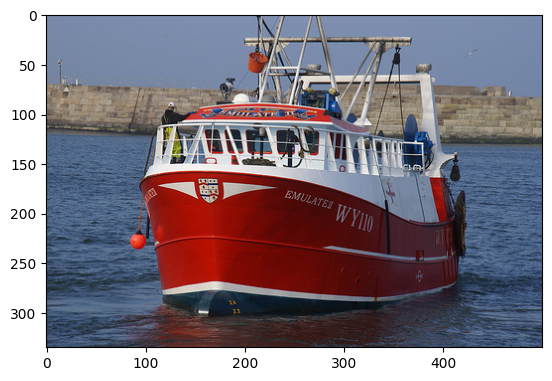

In [83]:
valImageNames = getAllImageNames(valImagesDir)
displayRandomImage(valImagesDir, valImageNames)

In [84]:
def getAnnotationsAsJSON(pathToAnnotationsDir, fileName):
    '''
        ### getAnnotationsAsJSON
        opens the given annotation file and parses it as JSON
        :param pathToAnnotationsDir: path to annotations folder (with trailing slash)
        :param fileName: name of the file containing coco annotations
        :returns: parsed annotations file as JSON
    '''
    pathToFile = pathToAnnotationsDir+fileName#+"instances_val2017.json"
    annotationsFile= open(pathToFile)
    annotationsJSON = json.load(annotationsFile)
    return annotationsJSON

In [93]:
valAnnotationsJSON = getAnnotationsAsJSON(valAnnotationsDir, "instances_val2017.json")

In [86]:
def associateImageWithItsAnnotations(annotationsJSON):
    '''
        ### associateImageWithItsAnnotations
        creates a dictionary which contains ImageId (key) and a list of annotations in that image (values)

        :param annotationsJSON: file with annotations parsed as JSON (e.g. result of getAnnotationsAsJSON)
        :return: dictionary: Key=ImageId    Value=list of annotations in that image
    '''
    imageIdToAnnotations = defaultdict(list)
    for ann in annotationsJSON["annotations"]:
        imageId = ann["image_id"]
        imageIdToAnnotations[imageId].append(ann)
    return imageIdToAnnotations

In [87]:
valImageIdToAnnotations = associateImageWithItsAnnotations(valAnnotationsJSON)

In [88]:
def associateCategoryIdWithItsName(annotationsJSON):
    '''
        ### associateCategoryIdWithItsName
        creates a dictionary which contains CategoryId (key) and its name (value)

        :param annotationsJSON: file with annotations parsed as JSON (e.g. result of getAnnotationsAsJSON)
        :return: dictionary: Key=CategoryId    Value=category name
    '''
    categoryIdToName = {}
    for category in annotationsJSON["categories"]:
        categoryIdToName[category["id"]] = category["name"]
    return categoryIdToName

In [89]:
valCategoryIdToName = associateCategoryIdWithItsName(valAnnotationsJSON)

In [90]:
def showRandomImageWithAnnotations(directoryPath, imageNames, imageIdToAnnotations, categoryIdToName):
    '''
        ### showRandomImageWithAnnotations
        selects and displays random image from given directory with the bounding boxes

        :param directoryPath: path to the directory with images (with trailing slash)
        :param imageNames: list of image names to choose from. e.g. getAllImageNames result
        :param imageIdToAnnotations: directory where key=imageId, value=list of its annotations (e.g. result of associateImageWithItsAnnotations)
        :param associateCategoryIdWithItsName: directory where key=categoryId, value=categoryName (e.g. result of associateCategoryIdWithItsName)
    '''
    randomImageId = random.randint(0,len(imageNames)-1)
    randomImageName = imageNames[randomImageId]
    imageIdFromCoco = int(re.search(r'[1-9]\d*',randomImageName).group(0))
    img = Image.open(directoryPath+randomImageName)
    fig, ax = plt.subplots()
    print(randomImageName)
    imageAnns = imageIdToAnnotations[imageIdFromCoco]
    for imageAnn in imageAnns:
        name = categoryIdToName[imageAnn["category_id"]]
        
        bbox = imageAnn["bbox"]
        x = float(bbox[0])
        y = float(bbox[1])
        width = float(bbox[2])
        height = float(bbox[3])

        colours = random.random(), random.random(), random.random()
        t = plt.text(x+1, y-5, name, fontdict={'fontsize':10.0, 'fontweight':'medium','color':'white'})#,'backgroundcolor':'red'})
        t.set_bbox(dict(facecolor=colours, alpha=0.7, edgecolor=colours))
        bb = patches.Rectangle((x,y),width,height, linewidth=2,edgecolor=colours, facecolor="none")
        ax.add_patch(bb)

    ax.imshow(img)
    plt.show()
    

000000076625.jpg


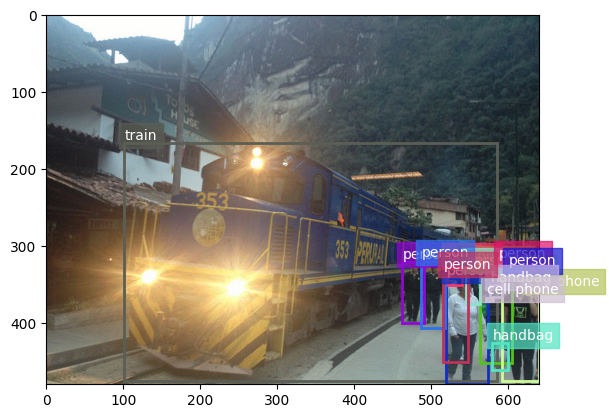

In [91]:
showRandomImageWithAnnotations(valImagesDir, valImageNames, valImageIdToAnnotations, valCategoryIdToName)